# Terrain Profiles in Python

# Introduction

Imagine you are a newbie surveyor sent to the field. You only have two instruments, your brain and your phone. Your boss, (and he's harsh) requires that you create a terrain profile of your journey from Point A to Point B. And the deadline is just 7 days away. What do you do? Most of today's smartphones can download a GPS app, which come with the altitude calculator inherent in them. Problem one sorted. You collect the GPS locations with their corresponding altitude readings and call it a day. Problem two: how to plot the terrain profile in python. You remember that Qgis has a very simple tool called the Profile tool, but then a flashing thought reminds you that you were teaching yourself how to code :(. Practice makes perfect, and you have to perfect the art of your coding practice. 

As usual, you go to your laptop and as always, you load in the usual tools.

In [1]:
# Import the needed packages for data science and dataframes
import pandas as pd
import geopandas as gpd
import os

Things are proceeding well, you have already loaded the necessary packages. Next, you want to call in the .csv file containing your GPS readings. That's also an easy task. You actually do it as you talk to you check the traffic outside. 

In [2]:
# Import the CSV containing the GPS coordinates and their altitude
path = "E:/documents/gis800_articles/jupyter/terrain_profile"
gps = pd.read_csv(os.path.join(path, 'gps.csv'))
gps.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  
0                            Junction at Magadi road  
1                               Start of murram road  
2  Bend before reaching the bridge crossing river...  
3                         a few metres to the bridge  
4  A group of zebras were sighted grazing in an o...

The above steps were a no brainer. You actually commend yourself for being a good programming learner. You actually look forward to a slightly harder task of converting the above csv table to a dataframe. This is because, as per your programming lessons so far, a geodataframe has to be created from a dataframe if you want to work with tabular data for geospatial analyses. This is another exciting exercise, and because of its simplicity, you do it in a whirl.

In [3]:
# Convert to a dataframe
gps_df = pd.DataFrame(gps)
gps_df.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  
0                            Junction at Magadi road  
1                               Start of murram road  
2  Bend before reaching the bridge crossing river...  
3                         a few metres to the bridge  
4  A group of zebras were sighted grazing in an o...

You love the progress. All the above done in less than 10 minutes. You just want to confirm that what you got is now a dataframe. The feeling of transforming a csv to a dataframe should be enough reward.

In [4]:
# Check the class of gps_df
type(gps_df)

pandas.core.frame.DataFrame

Now the following step of converting the dataframe to a geodataframe is not too intuitive. It requires more parameters and arguments than the above three coding exercises. However, based on your (sometimes painful) programming tutorials, you have been taught the art of searching for solutions from the web. You actually do so, and you learn that geopandas has the [GeoDataFrame](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html) method to do precisely this function. It's another walkover.

However, there is a twist. The `GeoDataFrame` method requires we define the CRS. So you quickly search for which package does this, and then call it into Jupyter, your working platform.

In [5]:
# Import the package for CRS manipulations
from pyproj import CRS

In [6]:
# Now convert to a geodataframe
gps_points = gpd.GeoDataFrame(gps_df, 
                             geometry=gpd.points_from_xy(gps_df['Longitude'], gps_df['Latitude']),
                             crs=CRS.from_authority('EPSG', '4326'))

gps_points.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  \
0                            Junction at Magadi road   
1                               Start of murram road   
2  Bend before reaching the bridge crossing river...   
3                         a few metres to the bridge   
4  A group of zebras were sighted grazing in an o...   

                    geometry  
0  POINT (36.76967 -1.39068)  
1  POINT (36.79066 -1.39868)  
2  POINT (36.79813 -1.39745)  
3  POINT (36.79817 -1.39735)  
4  POINT (36.79962 -1.39969)

You clap yourself for the progress so far. So you can actually work out all this stuff with code? How cool? Once again, you want to test your fingertips once more by confirming the above table is indeed a geodataframe.

In [7]:
# Check the CRS of our geodataframe
gps_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Okay, so far so good. You are dying to draw a terrain profile. Wasn't that the prime aim. Too much aimless coding will not replace that your boss wanted a terrain profile of your fieldwork in 7 days minus a few hours. You search online. From the videos on you tube such as this one here(https://www.youtube.com/watch?v=pAWB4qVFZ9w) lasting 45 minutes seem scary enough. Why should something so simple take so long? You have the temptation of using Qgis, but it will be like a blow to your coding ego. To preserve your machoism, you remember that `Plotly` is a package for creating cool graphs. Why not use that to create an elevation profile? Again, you need to plot the relevant packages. 

In [8]:
# Plotly is a tool for drawing interactive graphs
import plotly.express as px
import kaleido # Useful in saving plotly graphs to pc

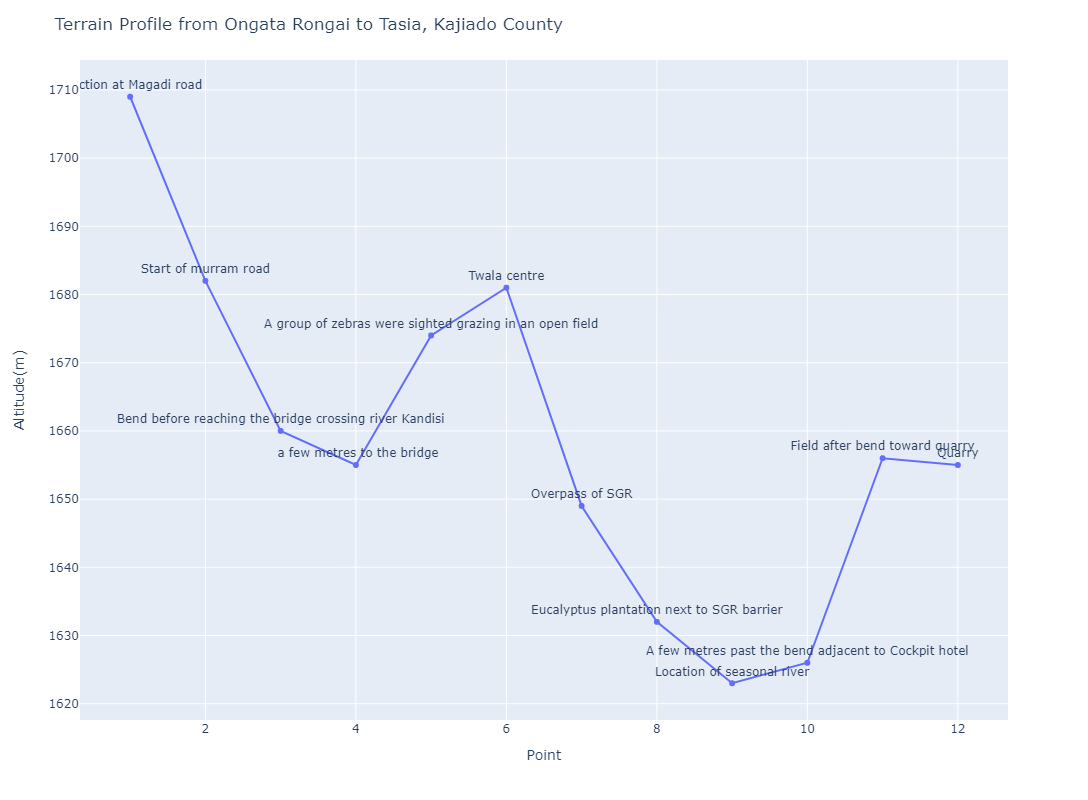

In [9]:
# Plot the terrain profile
fig = px.line(data_frame=gps_points, x='Point', y='Altitude(m)', text='Description')
fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Terrain Profile from Ongata Rongai to Tasia, Kajiado County'
)
fig.show()
fig.write_image(os.path.join(path, 'terrain.jpg'), width=1500, height=900)

That's it! Now to just confirm that these coordinates also fall in the right places that you conducted your fieldwork, you also want to plot them overlying a basemap, just for your boos to know that indeed you went to the right place. Did you think of basemaps? Your research shows that `contextily` is a wonderful package for wonderful maps.

In [10]:
# Import contextily
import contextily as cx
import matplotlib.pyplot as plt

Now that you have you have loaded the package, time for the ultimate delivery. Creating a basemap with your GPS coordinates and their altitudes overlain.

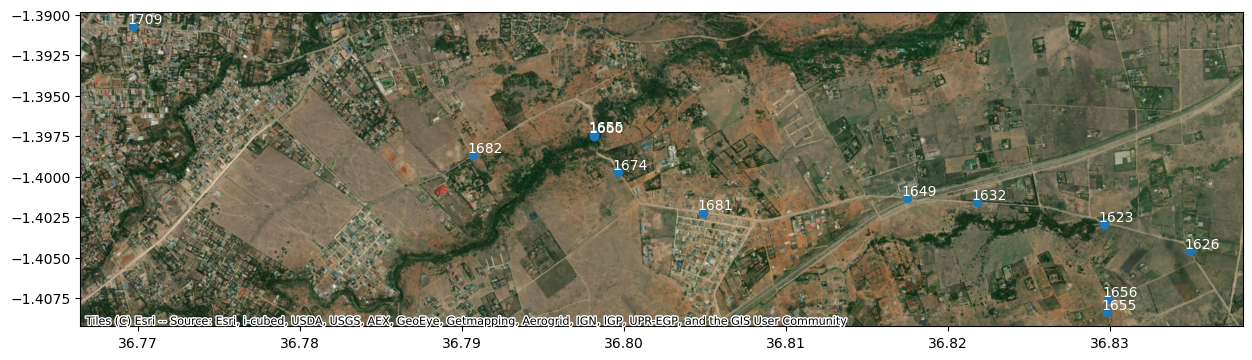

In [11]:
fig, ax = plt.subplots(figsize=(15, 9))
gps_points_map = gps_points.plot(ax=ax)

for alt, lon, lat in zip(gps_points['Altitude(m)'], gps_points['Longitude'], gps_points['Latitude']):
    gps_points_map.annotate(alt, xy=(lon, lat), xytext=(-4, 2), textcoords='offset points', color='white')
    
cx.add_basemap(ax, crs=CRS.from_authority('EPSG', '4326'), source=cx.providers.Esri.WorldImagery)

In [12]:
############3

Let's suppose you would like to view the path that you followed as you were colleting the GPS coordinates. For that, we will have to convert the geodataframe to a LineString. To work with linestrings, we use the `shapely.geometry` package.


In [13]:
# Import the package to work with linestrings
from shapely.geometry import LineString

Let's create a function that converts a geodataframe to a linestring.


In [14]:
# Extract list of coordinates to create linestring
geom_list = []
for xy in zip(gps_points['Longitude'], gps_points['Latitude']):
    geom_list.append(xy)
    
print(geom_list)
                  

[(36.76967061, -1.39068412), (36.79066426, -1.3986755), (36.79812947, -1.3974481), (36.79817471, -1.39734767), (36.79962135, -1.39969483), (36.80488978, -1.40220242), (36.81747036, -1.40132149), (36.8218044, -1.40157005), (36.82966621, -1.40291262), (36.8349445, -1.40457771), (36.82987579, -1.40756392), (36.82985959, -1.40834375)]


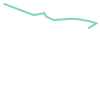

In [15]:
geom_path = LineString(geom_list)
geom_path

Create a line shapefile (https://hatarilabs.com/ih-en/how-to-create-a-pointlinepolygon-shapefile-with-python-and-fiona-tutorial?utm_source=pocket_reader)

In [16]:
gps_points.head()

Point  Latitude  Longitude  Accuracy(m)  Altitude(m)  \
0      1 -1.390684  36.769671            4         1709   
1      2 -1.398675  36.790664            9         1682   
2      3 -1.397448  36.798129            3         1660   
3      4 -1.397348  36.798175            5         1655   
4      5 -1.399695  36.799621            3         1674   

                                         Description  \
0                            Junction at Magadi road   
1                               Start of murram road   
2  Bend before reaching the bridge crossing river...   
3                         a few metres to the bridge   
4  A group of zebras were sighted grazing in an o...   

                    geometry  
0  POINT (36.76967 -1.39068)  
1  POINT (36.79066 -1.39868)  
2  POINT (36.79813 -1.39745)  
3  POINT (36.79817 -1.39735)  
4  POINT (36.79962 -1.39969)

We will create the format in which our attributes shall be stored.

In [17]:
# define schema
schema = {
    'geometry':'LineString',
    'properties':[('Name','str')]
}

We will import the `fiona` package to help us in creating a shapefile.

In [18]:
# Import fiona
import fiona

Let's create our shapefile, note that the `schema` parameter will arrange the attributes using our framework above.

In [78]:
lineShp = fiona.open(os.path.join(path, 'shapefile', 'path.shp'), mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

Let's sequentially arrange our coordinates to create a shapefile that will resemble, if not copy the path we followed during our fieldwork.

In [79]:
#get list of points
xyList = []
rowName = ''
for index, row in gps_points.iterrows():
    xyList.append((row['Longitude'], row['Latitude']))
    rowName = row['Description']

print(xyList)
print(rowName)                             

[(36.76967061, -1.39068412), (36.79066426, -1.3986755), (36.79812947, -1.3974481), (36.79817471, -1.39734767), (36.79962135, -1.39969483), (36.80488978, -1.40220242), (36.81747036, -1.40132149), (36.8218044, -1.40157005), (36.82966621, -1.40291262), (36.8349445, -1.40457771), (36.82987579, -1.40756392), (36.82985959, -1.40834375)]
Quarry


Write our attributes to the shapefile.

In [80]:
#save record and close shapefile
rowDict = {
'geometry' : {'type':'LineString',
                 'coordinates': xyList},
'properties': {'Name' : rowName},
}
lineShp.write(rowDict)
#close fiona object
lineShp.close()

Now let's load our shapefile and plot it on a basemap without further ado.

In [81]:
# Read shapefile
shapefile = gpd.read_file(os.path.join(path, 'shapefile', 'path.shp'))

<AxesSubplot: >

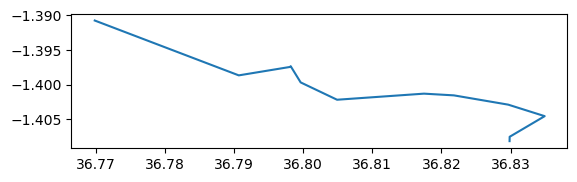

In [82]:
shapefile.plot()

Here is our path in real life.

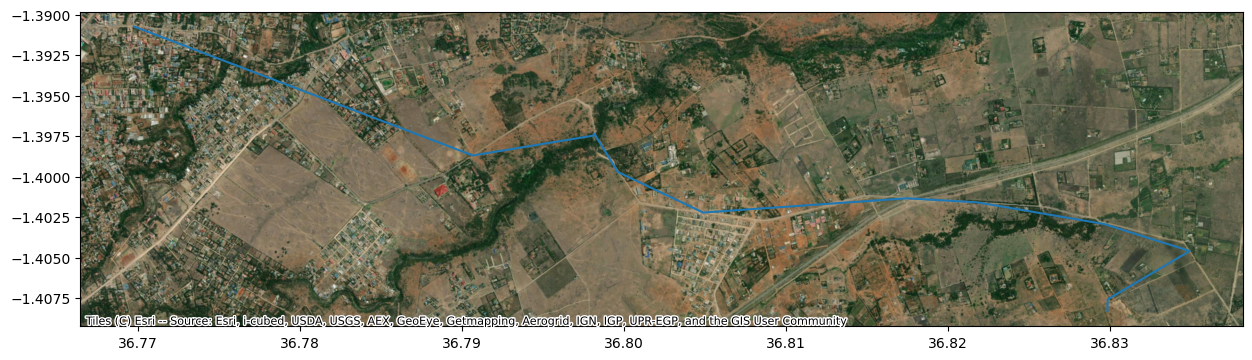

In [92]:
# Plot your path
fig, ax = plt.subplots(figsize=(15, 9))
shapefile_map = shapefile.plot(ax=ax)
  
cx.add_basemap(ax=ax, crs=CRS.from_authority('EPSG', '4326'), source=cx.providers.Esri.WorldImagery)


That's it!

# Conclusion